# Assignment 3: Hello Vectors (with Synthetic Data)

This notebook explores word vectors and their properties using a synthetic dataset. You'll predict analogies, use PCA to visualize embeddings, and compare word similarities.

## 1. Creating a Synthetic Dataset
We'll create a small set of synthetic word vectors and a simple analogy dataset for demonstration.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a small synthetic word embedding dictionary (vectors in 5D for simplicity)
word_embeddings = {
    'king':     np.array([0.8, 0.6, 0.7, 0.9, 0.5]),
    'queen':    np.array([0.82, 0.58, 0.72, 0.88, 0.52]),
    'man':      np.array([0.7, 0.5, 0.6, 0.8, 0.4]),
    'woman':    np.array([0.72, 0.48, 0.62, 0.78, 0.42]),
    'paris':    np.array([0.1, 0.9, 0.2, 0.8, 0.3]),
    'france':   np.array([0.12, 0.88, 0.22, 0.78, 0.32]),
    'rome':     np.array([0.2, 0.8, 0.3, 0.7, 0.4]),
    'italy':    np.array([0.22, 0.78, 0.32, 0.68, 0.42]),
    'madrid':   np.array([0.3, 0.7, 0.4, 0.6, 0.5]),
    'spain':    np.array([0.32, 0.68, 0.42, 0.58, 0.52]),
    'berlin':   np.array([0.4, 0.6, 0.5, 0.5, 0.6]),
    'germany':  np.array([0.42, 0.58, 0.52, 0.48, 0.62]),
    'happy':    np.array([0.9, 0.1, 0.8, 0.2, 0.7]),
    'sad':      np.array([0.1, 0.9, 0.2, 0.8, 0.3]),
    'joyful':   np.array([0.88, 0.12, 0.78, 0.22, 0.68]),
    'oil':      np.array([0.5, 0.2, 0.7, 0.1, 0.6]),
    'gas':      np.array([0.52, 0.18, 0.72, 0.08, 0.62]),
    'petroleum':np.array([0.54, 0.16, 0.74, 0.06, 0.64]),
    'city':     np.array([0.3, 0.7, 0.4, 0.6, 0.5]),
    'town':     np.array([0.28, 0.72, 0.38, 0.62, 0.48]),
    'village':  np.array([0.26, 0.74, 0.36, 0.64, 0.46]),
    'country':  np.array([0.4, 0.6, 0.5, 0.5, 0.6]),
    'continent':np.array([0.6, 0.4, 0.7, 0.3, 0.8])
}

# Create a synthetic analogy dataset (city1, country1, city2, country2)
data = pd.DataFrame([
    ['paris', 'france', 'rome', 'italy'],
    ['rome', 'italy', 'madrid', 'spain'],
    ['madrid', 'spain', 'berlin', 'germany'],
    ['berlin', 'germany', 'paris', 'france'],
    ['king', 'man', 'queen', 'woman'],
    ['happy', 'joyful', 'sad', 'joyful'],
    ['oil', 'petroleum', 'gas', 'petroleum'],
    ['city', 'country', 'village', 'country']
], columns=['city1', 'country1', 'city2', 'country2'])

print('Loaded', len(word_embeddings), 'synthetic word vectors.')
data.head()

Loaded 23 synthetic word vectors.


,city1,country1,city2,country2
0,paris,france,rome,italy
1,rome,italy,madrid,spain
2,madrid,spain,berlin,germany
3,berlin,germany,paris,france
4,king,man,queen,woman


## 2. Cosine Similarity
Let's define a function to compute the cosine similarity between two word vectors.

In [3]:
def cosine_similarity(A, B):
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)
    return cos

# Example
print('Cosine similarity (king, queen):', cosine_similarity(word_embeddings['king'], word_embeddings['queen']))

Cosine similarity (king, queen): 0.9996187484134804


## 3. Euclidean Distance
Now, let's define a function to compute the Euclidean distance between two word vectors.

In [4]:
def euclidean(A, B):
    d = np.linalg.norm(A - B)
    return d

# Example
print('Euclidean distance (king, queen):', euclidean(word_embeddings['king'], word_embeddings['queen']))

Euclidean distance (king, queen): 0.04472135954999579


## 4. Predicting Countries from Capitals
Let's use the embeddings to predict the country given a capital, using vector arithmetic and cosine similarity.

In [6]:
def get_country(city1, country1, city2, word_embeddings, cosine_similarity=cosine_similarity):
    group = (city1, country1, city2)
    city1_emb = word_embeddings[city1]
    country1_emb = word_embeddings[country1]
    city2_emb = word_embeddings[city2]
    vec = country1_emb - city1_emb + city2_emb
    similarity = -1
    country = ''
    for word in word_embeddings.keys():
        if word not in group:
            word_emb = word_embeddings[word]
            cur_similarity = cosine_similarity(vec, word_emb)
            if cur_similarity > similarity:
                similarity = cur_similarity
                country = (word, similarity)
    return country

# Example
print('paris is to france as rome is to:', get_country('paris', 'france', 'rome', word_embeddings))

paris is to france as rome is to: ('italy', np.float64(1.0000000000000002))


## 5. Model Accuracy
Let's check the accuracy of our model on the capitals dataset.

In [7]:
def get_accuracy(word_embeddings, data, get_country=get_country):
    num_correct = 0
    for i, row in data.iterrows():
        city1 = row[0]
        country1 = row[1]
        city2 = row[2]
        country2 = row[3]
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)
        if predicted_country2 == country2:
            num_correct += 1
    accuracy = num_correct / len(data)
    return accuracy

accuracy = get_accuracy(word_embeddings, data)
print(f'Accuracy is {accuracy:.2f}')

Accuracy is 0.62


C:\Users\Dell\AppData\Local\Temp\ipykernel_12068\1043087521.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  city1 = row[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_12068\1043087521.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country1 = row[1]
C:\Users\Dell\AppData\Local\Temp\ipykernel_12068\1043087521.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  city2 = row[2]
C:\Users\Dell\AppData\Local\Temp\ipykernel_12068\104

## 6. PCA for Visualization
Let's use PCA to reduce the dimensionality of word vectors and plot them in 2D.

You have 11 words each of 5 dimensions thus X.shape is: (11, 5)


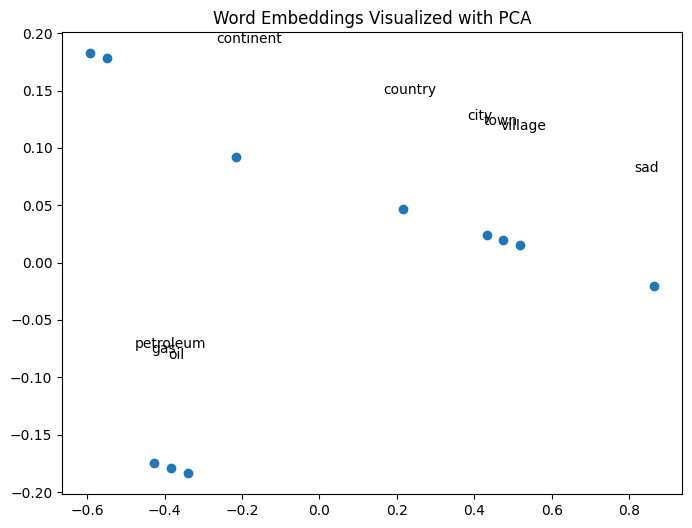

In [8]:
def compute_pca(X, n_components=2):
    X_demeaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)
    idx_sorted = np.argsort(eigen_vals)[::-1]
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted]
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]
    X_reduced = np.dot(X_demeaned, eigen_vecs_subset)
    return X_reduced

# Helper to get vectors for a list of words
def get_vectors(word_embeddings, words):
    return np.array([word_embeddings[w] for w in words])

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
X = get_vectors(word_embeddings, words)
print('You have', len(words), 'words each of', X.shape[1], 'dimensions thus X.shape is:', X.shape)
result = compute_pca(X, 2)
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))
plt.title('Word Embeddings Visualized with PCA')
plt.show()

---
You can see that similar words are clustered together in the plot. This demonstrates how word vectors capture semantic relationships!